# Reto 1: Boxplots

## 1. Objetivos:
- Aprender a graficar e interpretar boxplots utilizando Seaborn
- Aprender a lidiar con valores atípicos usando IQR-Score
 
---
    
## 2. Desarrollo:

### a) Usando boxplots para analizar la distribución de nuestros datos

Vamos a hacer algunas gráficas de boxplot y describirlas en equipo. Usa Seaborn para generar gráficas boxplot de los siguientes datasets y columnas:

1. Dataset: 'near_earth_objects-jan_feb_1995-clean.csv'
    - Columnas a graficar: 'estimated_diameter.meters.estimated_diameter_max' y 'relative_velocity.kilometers_per_second'
2. Dataset: 'new_york_times_bestsellers-clean.json'
    - Columnas a graficar: 'price.numberDouble'
3. Dataset: 'melbourne_housing-clean.csv'
    - Columnas a graficar: 'land_size'
    
> Para conocer más detalles acerca de estos datasets, ve a Datasets/Readme.md y visita los links de las fuentes de donde provienen. Es una gran idea hacer esto para que entiendas el contexto alrededor de los análisis que vamos a estar realizando.
    
Realiza estas 4 visualizaciones y comenta con la experta y tus compañeros qué conclusiones o hipótesis podemos hacer sobre nuestros datos. Para profundizar en el análisis puedes obtener también el rango, la mediana, el valor mínimo y máximo, el percentil 25 y el percentil 75. De esta manera tendrás valores concretos con los que realizar tu análisis.

In [1]:
# Importar bibliotecas y datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_earth_objects = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/near_earth_objects-jan_feb_1995-clean.csv", index_col=0)
df_nyt = pd.read_json("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/new_york_times_bestsellers-clean.json")
df_housing = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/melbourne_housing-clean.csv", index_col=0)

In [14]:
# Función para visualizar
def visualize(dataframe, column, title_plot, whiskers=1.5):
    sns.boxplot(data=dataframe, x=column, whis=whiskers)
    plt.title(title_plot)
    print(dataframe[column].describe().T)

#### Visualizaciones ➡ Nearh Earth Objects

count     333.000000
mean      410.086042
std       614.691592
min         2.978791
25%        62.235757
50%       215.794305
75%       517.654482
max      6516.883822
Name: estimated_diameter.meters.estimated_diameter_max, dtype: float64


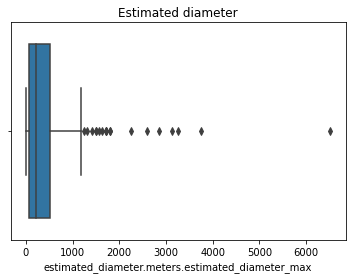

In [15]:
visualize(df_earth_objects, 'estimated_diameter.meters.estimated_diameter_max', "Estimated diameter")

count    333.000000
mean      14.984228
std        7.995994
min        0.681437
25%        8.599443
50%       14.257166
75%       18.782546
max       40.527428
Name: relative_velocity.kilometers_per_second, dtype: float64


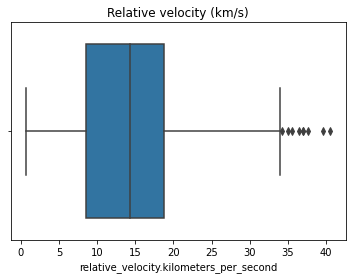

In [4]:
visualize(df_earth_objects, 'relative_velocity.kilometers_per_second', "Relative velocity (km/s)" )

#### Visualizaciones ➡ NYT Best sellers

count    3033.000000
mean       26.818368
std         1.787720
min        14.990000
25%        25.950000
50%        26.950000
75%        27.990000
max        34.990000
Name: price.numberDouble, dtype: float64


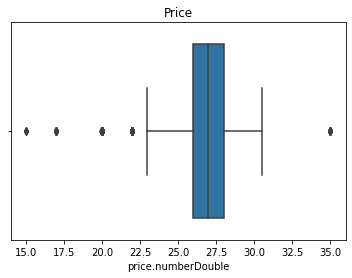

In [5]:
visualize(df_nyt, 'price.numberDouble', "Price")

#### Visualizaciones ➡ Melbourne Housing

count    11646.000000
mean       554.458097
std       1460.432326
min          0.000000
25%        162.000000
50%        412.000000
75%        656.000000
max      76000.000000
Name: land_size, dtype: float64


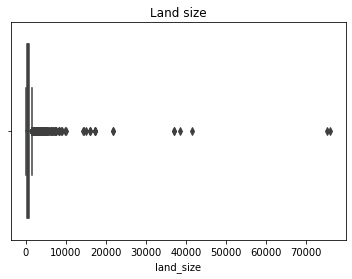

In [16]:
visualize(df_housing, 'land_size', "Land size")

### b) Eliminando valores atípicos

A partir de las visualizaciones que realizaste en el punto anterior, decide en cuáles columnas tenemos valores atípicos que pueden estorbarnos en nuestro análisis. Elimina dichos valores atípicos usando el Score de Rango Intercuartílico. Puedes probar variando un poco la medida del Score (1.5 * IQR) para eliminar solamente los valores que tú consideras como extremos.

Para observar los cambios a detalle, obtén la mediana, la media y la desviación estándar de tus datos *antes* y *después* de eliminar los valores atípicos. Compara estos valores y explica qué es lo que está pasando.

Grafica de nuevo tus datos sin valores atípicos para compararlos con las gráficas anteriores.

Comenta con la experta y tus compañeros tus hallazgos.

In [7]:
# Eliminar datos que se encuentren fuera de el precentil 10 y 90
#def filter_percentiles(dataframe, column, perc_inf = 0.10, perc_sup = 0.90):
#    lower_perc, upper_perc = dataframe[column].quantile([perc_inf, perc_sup]).values
#    mask_1 = dataframe[column] >= lower_perc
#    mask_2 = dataframe[column] <= upper_perc
#    mask_3 = mask_1 & mask_2
#    new_dataframe = dataframe[mask_3]
#    return new_dataframe


In [17]:
def filter_percentiles(dataframe, column, score = 1.5):
    iqr = dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25)
    mask_1 = dataframe[column] > dataframe[column].quantile(0.25) - (iqr * score)
    mask_2 = dataframe[column] < dataframe[column].quantile(0.75) + (iqr * score)
    mask_3 = mask_1 & mask_2
    new_dataframe = dataframe[mask_3]
    return new_dataframe

#### Visualizaciones ➡ Nearh Earth Objects - 2

In [9]:
new_df_earth_objects_01 = filter_percentiles(dataframe = df_earth_objects, column = 'estimated_diameter.meters.estimated_diameter_max')
new_df_earth_objects_02 = filter_percentiles(dataframe = df_earth_objects, column = 'relative_velocity.kilometers_per_second')

count    160.000000
mean     239.640188
std      128.093730
min       65.168838
25%      118.587791
50%      215.794305
75%      326.617897
max      494.356193
Name: estimated_diameter.meters.estimated_diameter_max, dtype: float64


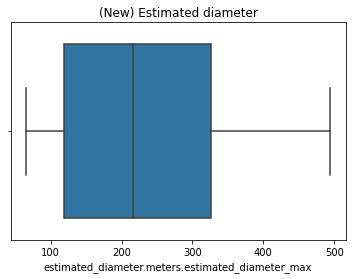

In [10]:
visualize(new_df_earth_objects_01, 'estimated_diameter.meters.estimated_diameter_max', "(New) Estimated diameter")

count    165.000000
mean      14.046506
std        2.954897
min        8.606068
25%       11.173874
50%       14.257166
75%       16.488846
max       18.697107
Name: relative_velocity.kilometers_per_second, dtype: float64


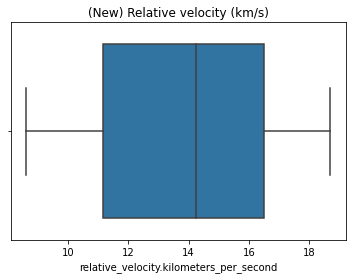

In [11]:
visualize(new_df_earth_objects_02, 'relative_velocity.kilometers_per_second', "(New) Relative velocity (km/s)")

#### Visualizaciones ➡ NYT Best sellers - 2

count    1327.000000
mean       27.058975
std         0.724795
min        25.990000
25%        26.950000
50%        26.990000
75%        27.950000
max        27.950000
Name: price.numberDouble, dtype: float64


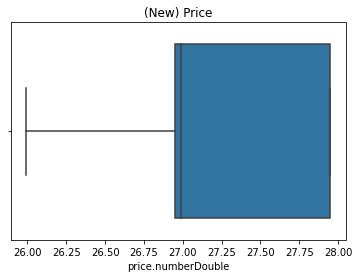

In [12]:
new_df_nyt = filter_percentiles(dataframe = df_nyt, column = 'price.numberDouble', score = 1.5)
visualize(new_df_nyt, 'price.numberDouble', "(New) Price")

#### Visualizaciones ➡ Melbourne Housing

count    10907.000000
mean       390.967360
std        287.377292
min          0.000000
25%        150.000000
50%        366.000000
75%        620.000000
max       1294.000000
Name: land_size, dtype: float64


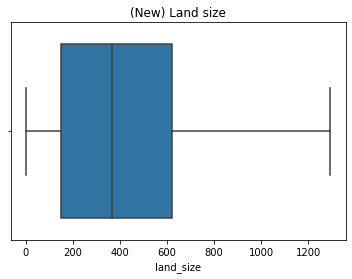

In [21]:
new_df_housing = filter_percentiles(dataframe = df_housing, column = 'land_size', score = 1.3)
visualize(new_df_housing, 'land_size', "(New) Land size")